<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/Liver-disorder/liver_disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset link: 

https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bupa.data", delimiter =',', names=['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'])
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [4]:
df['selector'].unique()

array([1, 2])

In [5]:
## firstly converting the 1 and 2 as 0 and 1 respectively

df['selector'] = df['selector'].map({1:0, 2:1})
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,0
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


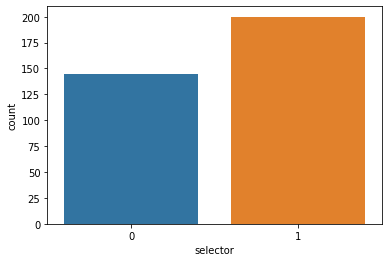

In [6]:
sns.countplot(x = 'selector', data = df)

In [7]:
df.shape

(345, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


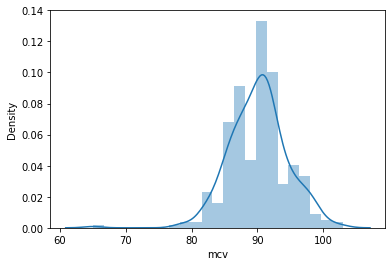

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


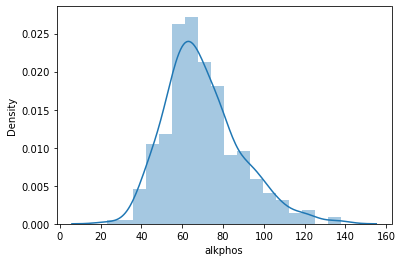

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


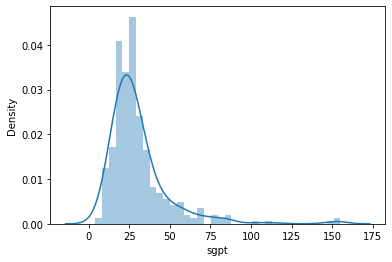

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


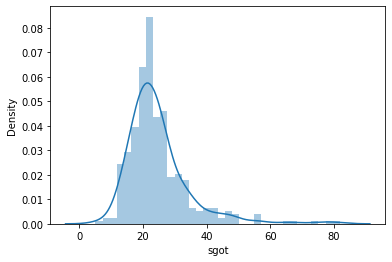

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


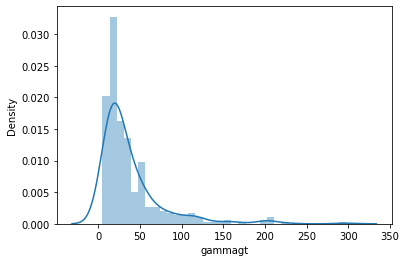

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


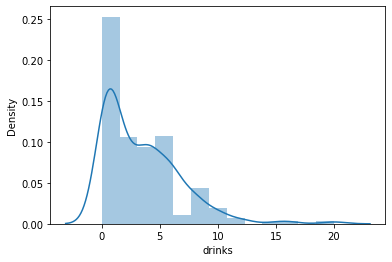

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


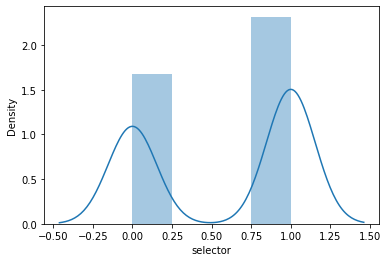

In [10]:
## Checking the distribution of each data

for column in df.columns:
    sns.distplot(df[column], kde = True)
    plt.show()

In [11]:
## Making it as standard form

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('selector', axis = 1)
y = df['selector']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
## Applying the logisitic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print("Model accuracy on training data : ", accuracy_score(model.predict(X_train_scaled), y_train))
pred = model.predict(X_test_scaled)
print("Model accuracy on test data : ", accuracy_score(pred, y_test))
print("classification_report :\n", classification_report(pred, y_test))

Model accuracy on training data :  0.5942028985507246
Model accuracy on test data :  0.6811594202898551
classification_report :
               precision    recall  f1-score   support

           0       0.48      0.76      0.59        21
           1       0.86      0.65      0.74        48

    accuracy                           0.68        69
   macro avg       0.67      0.70      0.67        69
weighted avg       0.75      0.68      0.69        69



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_scaled, y_train)
print("Model accuracy on training data : ", accuracy_score(model.predict(X_train_scaled), y_train))
pred = model.predict(X_test_scaled)
print("Model accuracy on test data : ", accuracy_score(pred, y_test))
print("classification_report :\n", classification_report(pred, y_test))


Model accuracy on training data :  0.7934782608695652
Model accuracy on test data :  0.6811594202898551
classification_report :
               precision    recall  f1-score   support

           0       0.42      0.82      0.56        17
           1       0.92      0.63      0.75        52

    accuracy                           0.68        69
   macro avg       0.67      0.73      0.66        69
weighted avg       0.80      0.68      0.70        69



In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
print("Model accuracy on training data : ", accuracy_score(model.predict(X_train_scaled), y_train))
pred = model.predict(X_test_scaled)
print("Model accuracy on test data : ", accuracy_score(pred, y_test))
print("classification_report :\n", classification_report(pred, y_test))


Model accuracy on training data :  1.0
Model accuracy on test data :  0.7971014492753623
classification_report :
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        23
           1       0.94      0.74      0.83        46

    accuracy                           0.80        69
   macro avg       0.79      0.83      0.79        69
weighted avg       0.84      0.80      0.80        69



In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()
model.fit(X_train_scaled, y_train)
print("Model accuracy on training data : ", accuracy_score(model.predict(X_train_scaled), y_train))
pred = model.predict(X_test_scaled)
print("Model accuracy on test data : ", accuracy_score(pred, y_test))
print("classification_report :\n", classification_report(pred, y_test))

Model accuracy on training data :  0.7753623188405797
Model accuracy on test data :  0.6231884057971014
classification_report :
               precision    recall  f1-score   support

           0       0.45      0.65      0.54        23
           1       0.78      0.61      0.68        46

    accuracy                           0.62        69
   macro avg       0.62      0.63      0.61        69
weighted avg       0.67      0.62      0.63        69

